In [44]:
import numpy as np
import pandas as pd
from matplotlib import  pyplot as plt
%matplotlib inline 
import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [45]:
ds =pd.read_csv('train.csv')
all_data = ds.values[:5000, :]
print all_data.shape

(5000, 785)


In [46]:
import datetime

In [47]:
X = all_data[:, 1:]
Y = all_data[:,0]

In [48]:
Y = np.asarray((Y%2 == 0), dtype='uint8')# converted to 0 and 1 .. easier to classify for logistic regression
print Y

[0 1 0 ..., 1 0 0]


In [49]:
start = datetime.datetime.now()
lr_01  = LogisticRegression()
lr_01.fit(X[:4500], Y[:4500])

print 'time taken ',datetime.datetime.now() - start



time taken  0:00:26.078239


In [50]:
lr_01.score(X[4500:],Y[4500:])


0.87

In [51]:
#apply pca 

pca = PCA(n_components=148)
XX = pca.fit_transform(X)



In [52]:
start = datetime.datetime.now()
lr_01  = LogisticRegression()
lr_01.fit(XX[:4500], Y[:4500])

print 'time taken ',datetime.datetime.now() - start


time taken  0:00:01.949107


In [53]:
lr_01.score(XX[4500:],Y[4500:])


0.91200000000000003

In [54]:

mean_01 = np.array([1, 1])
cov_01 = np.array([[2.9, 1.4], [1.7, 1.5]])

mean_02 = np.array([4, 7])
cov_02 = np.array([[2, -0.7], [-0.7, 1.5]])

data_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
data_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print data_01.shape
print data_02.shape


(500, 2)
(500, 2)


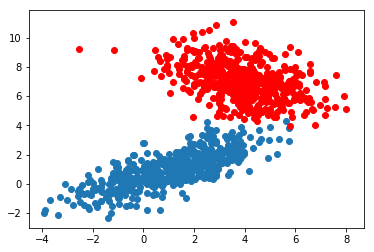

In [55]:
plt.figure(0)

plt.scatter(data_01[:, 0], data_01[:, 1])
plt.scatter(data_02[:, 0], data_02[:, 1], color='red')

plt.show()

In [56]:
all_data = np.zeros((1000, 3))

all_data[:500, :2] = data_01

all_data[500:, :2] = data_02
all_data[500:, -1] = 1

np.random.shuffle(all_data)
print all_data[:10]

[[ 4.54727707  7.463503    1.        ]
 [ 2.91032117  6.69753277  1.        ]
 [ 3.10494638  7.72411642  1.        ]
 [ 4.56773451  6.95054514  1.        ]
 [ 4.02239675  6.22233601  1.        ]
 [ 3.09440731  2.02693813  0.        ]
 [ 3.58101293  7.29476202  1.        ]
 [ 3.54791329  7.93067328  1.        ]
 [ 2.86769043  2.76978183  0.        ]
 [ 1.77096719  3.17487532  0.        ]]


In [57]:
split = int(0.8 * all_data.shape[0])

train = all_data[:split]
test = all_data[split:]

print train.shape, test.shape

(800, 3) (200, 3)


In [58]:
lr_02 = LogisticRegression(verbose=0)
lr_02.fit(train[:, :-1], train[:, -1])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
lr_02.score(test[:, :-1], test[:, -1])

0.98999999999999999

In [60]:
print lr_02.coef_
print lr_02.intercept_

[[-0.14933428  1.83652957]]
[-6.61572432]


In [61]:
#**************************

In [68]:
def check_pca_accuracy(X_data, y_data, n_components):
    pca = PCA(n_components=n_components)
    XX_data = pca.fit_transform(X_data)
    lr = LogisticRegression(n_jobs=-1)
    lr.fit(XX_data[:4500], y_data[:4500])
    return lr.score(XX_data[4500:], y_data[4500:])

In [69]:
dims  =  [2,25,32,64,128,256,343,512,784]
acc =[]
for dx  in dims :
    start = datetime.datetime.now()
    acc.append(check_pca_accuracy(X,Y,dx))
    print "time taken for dimension {0}:".format(dx), datetime.datetime.now() - start 
    


time taken for dimension 2: 0:00:00.189120
time taken for dimension 25: 0:00:00.265449
time taken for dimension 32: 0:00:00.309739
time taken for dimension 64: 0:00:00.771820
time taken for dimension 128: 0:00:01.877989
time taken for dimension 256: 0:00:05.216791
time taken for dimension 343: 0:00:08.651322
time taken for dimension 512: 0:00:48.358811
time taken for dimension 784: 0:01:25.659986


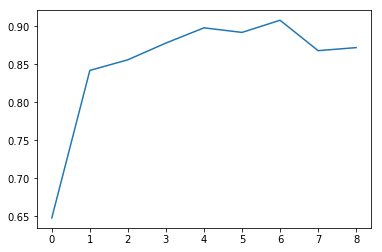

[0.64800000000000002, 0.84199999999999997, 0.85599999999999998, 0.878, 0.89800000000000002, 0.89200000000000002, 0.90800000000000003, 0.86799999999999999, 0.872]


In [70]:
plt.figure(0)
plt.plot(acc)
plt.show()
print acc